# Snapchat Political Ads

# Summary of Findings

### Introduction
As political campaigns look for resources and places to advertise, many will often look at social media as a way to publicize their cause. Social media networks allow information to spread instantaneously and political campaigns will often optimize this speed to communicate with others. Snapchat is a social media platform that allows advertisement of political campaigns and collects yearly data on many features that the creation and distribution of the ad has generated, including the number of times the ad has been viewed by users, country that the ad is targeting, the name of the organization responsible for organizing the ad, etc. In this project, different features of the advertisement will be used to assess differences in advertising methods throughout different countries. **Specifically, we will assess whether or not the United States tends to target Snapchat advertisements for older viewers compared to other countries.**

### Cleaning and EDA
First, we have to clean the data given in order to perform statistical analysis. We first focus on cleaning the dataset as a whole. Going to https://www.snap.com/en-US/political-ads/ gives us two csv files: one for the year 2018 and one for the year 2019. We convert both csv files into dataframes and then concatenate the data frames in order to get a singular set of data for our analysis. For future usages, we will add a year column to the dataframes indicating which year the information was gathered from. We then change the `StartTime` and `EndTime` columns into datetime objects. The "Z" at the end of each timestamp tells us that the time is in UTC timezone, so we will change the time to a more understandable, US/Central timezone.


We then focus our attention on cleaning our data to answer our question. Looking at our dataset, we find that the columns `CountryCode` and `AgeBracket` will be used to perform our analysis. Some elements within the `AgeBracket` will have to be cleaned for statistical analysis. Currently, the `AgeBracket` column contains ordinal data with some cells missing the max age range and extra `+` or `-` symbols. Thus, to manipulate `AgeBracket` into a quantitative value that we can analyze, we will make two assumptions:
* First assumption: If no max age range was given, then we will assume that the age range is up to age 24
    * An article https://influencermarketinghub.com/snapchat-statistics-revenue/ states that “90% of Snapchat users are 13-24 years old.”
    * The `.txt` file give to us through Snapchat states that if values in `AgeBracket` are null, then the ad is targeting all ages, thus we will assume that the ad is targeting mainly 13-24 year olds.
* Second assumption: The midpoint is an accurate represention of an ad's age bracket.

Given these assumptions, we clean and convert the `AgeBracket` column into a quantitative value that we can perform statistical analysis on. When plotting a graph of the density of age bracket midpoints, we get peaks at age 21, age 24, and age 26 . But when we plot graphs of US age bracket midpoints and other countries’ age bracket midpoints, we see that the US has a much higher peak at around age 21, age 24, and age 26 compared to the other countries.


### Assessment of Missingness
Missing data is a big part of data cleaning. We will look at two scenarios in which we determine whether the data is MCAR, MAR, or NMAR. The first scenario we will look at is the missingness of `Language`. We will then look at the missingness of the data we would like to analyze: `AgeBracket`.


* We will first determine the missingness of the `Language` column. It is a reasonable assumption to say that `Language` of an ad depends on `CountryCode` because different countries have different languages of preference. We will then run a permutation test with a significance level of $\alpha$ = 0.05 to analyze whether or not the missingness of `Language` is dependent on `CountryCode`. 
    1. Because `CountryCode` is a nominal data type, we will use the total variation distance between null and non_null `Language` values in order to determine dependence. 
    2. When calculating our observed TVD of the dataset, we get a value of around 0.4859.
    3. We will then simulate scenarios in which `Language` is not dependent on `CountryCode` by shuffling the values in `CountryCode` and then computing the TVD of the shuffled values. We repeat this 1000 times and get a distribution of TVD’s. 
    4. To compute the p-value, we find the proportion of times in which our shuffled TVD’s are greater than our observed TVD. 
    5. We find that the **p-value is 0.00**, indicating that there are no TVD’s generated from our shuffled TVD’s that are greater than our observed. **Because the p-value < $\alpha$, we reject our null hypothesis that `Language` is not dependent on `CountryCode` in favor of our alternative hypothesis that `Language` is dependent on `CountryCode`.**

* We will then determine the missingness of the `AgeBracket` column. It is a reasonable assumption to say that `AgeBracket` of an ad depends on `Impressions` because restricting the viewership of an ad will lead to less interactions with the ad. Thus, `AgeBrackets` that tend to be missing (thus targeting all viewer ages) will have a higher `Impressions` rating. We will then run a permutation test with a significance level of $\alpha$ = 0.05 to analyze whether or not the missingness of `AgeBracket` is dependent on `Impressions`. 
    1. Because `Impressions` is a qualitative data type, we will use the absolute difference in means `Impressions` between null and non_null `AgeBracket` values in order to determine dependence. 
    2. When calculating our observed difference in means of the dataset, we get a value of around 155102.02 difference in means impressions. 
    3. We will then simulate scenarios in which `AgeBracket` is not dependent on `Impressions` by shuffling `Impressions` and then computing its difference in means. We repeat this 1000 times and get a distribution of differences. 
    4. To compute the p-value, we find the proportion of times in which our shuffled differences are greater than our observed difference. 
    5. We find that the **p-value is 0.452**, indicating that about half of the differences generated from our shuffled `Impressions` are greater than our observed. **Because the p-value > $\alpha$, we cannot reject our null hypothesis that `AgeBracket` is not dependent on `Impressions` in favor of our alternative hypothesis that `AgeBracket` is dependent on `Impressions`.**

### Hypothesis Test
In our question, we wanted to ask whether or not the United States tends to target Snapchat advertisements for older viewers compared to other countries within `CountryCode`. We first create a null hypothesis that we can simulate and an alternative hypothesis. We have cleaned our data in the `AgeBracket` column to give us the midpoint of the age brackets in `MidPointAges`. Our test statistic will be the mean of the age bracket midpoints for the US vs. the mean of the age bracket midpoints for all countries. Thus our null hypothesis and alternative hypothesis are:
* $H_0:$ The mean age bracket midpoint for Snapchat ads in the US is similar to the mean age bracket midpoint for Snapchat ads in other countries
* $H_\alpha:$ The mean age bracket midpoint for Snapchat ads in the US is greater than the mean age bracket midpoint for Snapchat ads in other countries

We will then run a hypothesis test with a significance level of $\alpha$ = 0.05 to analyze whether or not we should be in favor of our null hypothesis or our alternative hypothesis.
1. When calculating our observed mean of the age bracket midpoints (mean midpoint of US Snapchat ads), we get around 22.13 or about an age of 22 years old.
2. We then simulate the null hypothesis by randomly sampling n midpoints from our data in `MidPointAges` and calculating the mean midpoint of the sample (where n is the number of ads that are targeted in the US). We repeat this 1000 times and get a distribution of means.
3. To compute the p-value, we find the proportion of times in which our sampled means are greater than our observed mean.
4. We find that the **p-value is 0.00**, indicating that there are no means generated from our shuffled means that are greater than our observed mean midpoint. **Because the p-value < $\alpha$, we reject our null hypothesis that US Snapchat ads target similar age groups compared to other countries in favor of our alternative hypothesis that US Snapchat ads target older age groups compared to other countries.**

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

In [2]:
# We downloaded the csv files and converted the files into a dataframe
ads_2018 = os.path.join('data', 'PoliticalAds - 2018.csv')
ads_2019 = os.path.join('data', 'PoliticalAds - 2019.csv')

#split into 2018 and 2019 year
political_ads_2018 = pd.read_csv(ads_2018)
political_ads_2019 = pd.read_csv(ads_2019)

# Add years to each dataframe indicating which year that the ad was advertised
political_ads_2018 = political_ads_2018.assign(Year = [2018] * len(political_ads_2018))
political_ads_2019 = political_ads_2019.assign(Year = [2019] * len(political_ads_2019))

# concatinate the two dataframes and create one political ads dataframe with the two years
political_2018_2019 = pd.concat([political_ads_2018, political_ads_2019], ignore_index = True)

In [3]:
# change StartDate and EndDate to datetimeobjects
political = political_2018_2019.assign(StartDate = political_2018_2019['StartDate'].apply(pd.to_datetime))
political_2018_2019 = political_2018_2019.assign(EndDate = political_2018_2019['EndDate'].apply(pd.to_datetime))

#convert UTC timezones into US/Central timezones
StartDate_localized = pd.DatetimeIndex(political_2018_2019['StartDate']).tz_convert('US/Central')
EndDate_localized = pd.DatetimeIndex(political_2018_2019['EndDate']).tz_convert('US/Central')

political_2018_2019 = political_2018_2019.assign(StartDate = StartDate_localized).assign(EndDate = EndDate_localized)
political_2018_2019.head()

,ADID,CreativeUrl,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,PayingAdvertiserName,...,OsType,Segments,LocationType,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),Targeting Geo - Postal Code,CreativeProperties,Year
0,96ec57079a71ebbee642d961b93e7b5af8e47a37560bcb...,https://www.snap.com/political-ads/asset/7dbb6...,90,18934,2018-10-24 09:32:39-05:00,2018-11-06 18:24:36-06:00,Chakra Strategies,"40101 Booth Kelly Road,Springfield,97478,US",NaN,Oregon Life United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:http://www.yes106.org/?utm_source...,2018
1,be1d4871be3aa070201e523a45a10d13fd447c4c9b9a42...,https://www.snap.com/political-ads/asset/910ee...,530,120259,2018-10-01 16:07:08-05:00,NaT,Mothership Strategies,"1328 Florida Avenue NW, Building C, Washington...",NaN,Voto Latino,...,NaN,Provided by Advertiser,NaN,NaN,Spanish Speakers,NaN,NaN,NaN,web_view_url:https://register.rockthevote.com/...,2018
2,a85b8ed372efb70f9a6541c34002acd68bbf8c5a3a7754...,https://www.snap.com/political-ads/asset/d95fa...,518,325243,2018-10-07 09:13:01-05:00,NaT,Chong and Koster,"1640 Rhode Island Ave. NW, Suite 600,Washingto...",NaN,Everytown for Gun Safety AF,...,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,web_view_url:https://act.everytown.org/sign/no...,2018
3,e3ec1ec0fbecc53e99c1dc2ddf5ce7a471b97a6f522152...,https://www.snap.com/political-ads/asset/a4316...,66,5650,2018-10-19 16:12:44-05:00,2018-11-05 22:59:59-06:00,Blueprint Interactive,"1730 Rhode Island Ave NW Suite 1014,Washington...",NaN,AFSCME Nevada,...,NaN,NaN,NaN,es,NaN,NaN,NaN,NaN,NaN,2018
4,86d18afdd5679e07b4f486dbb5135247398f8cf869995e...,https://www.snap.com/political-ads/asset/4a69e...,2310,248126,2018-10-17 10:00:00-05:00,2018-11-06 22:00:00-06:00,Democratic Congressional Campaign Committee,"430 S Capitol St SE,Washington,20003,US",NaN,DCCC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://mypollingplace.org,2018


In [4]:
political_2018_2019['AgeBracket'].unique()

array(['18+', '18-25', nan, '18-34', '15+', '18-29', '30-', '17+',
       '21-25', '20-29', '18-24', '30+', '25+', '18-28', '34-', '17-24',
       '18-20', '18-18', '20+', '18-23', '15-34', '18-30', '29+', '16-25',
       '35++', '22+', '20-', '15-19', '21+', '15-24', '16-24', '25-',
       '17-29', '31-34', '19-19', '23-', '17-25', '26-30', '18-26', '24-',
       '15-22', '19-27', '26+', '18-', '25-29', '21-30', '16-22', '21-34',
       '15-17', '21-', '14-20', '20-24', '16+', '15-20', '17-', '16-34',
       '19+', '16-', '20-23', '20-34', '26-', '14-21', '18-33', '18-22',
       '24+', '17-20', '15-23', '17-23', '25-34', '26-34', '18-19', '33+',
       '15-30', '19-34', '14-19', '17-30', '14-25', '23-34', '19-',
       '23-33', '16-19', '18-27', '21-24', '15-25', '14-18', '24-34',
       '14-16', '17-18', '18-32', '25-27', '19-25', '22-32', '18-21',
       '20-21', '20-25', '20-26', '15-18', '16-30', '28+', '19-30',
       '17-21', '17-34', '14-17'], dtype=object)

* Cleaning data often requires looking at the data first
    * The values in `AgeBracket` all have their minimum age range as 2 digits
    * The maximum range is either missing or also has 2 digits
        * If the maximum range is missing, then we will have a `+` or a `-` as the last character
    * All age ranges are visually integers
    * Filled nan values will be converted to `"13-24"`
* We will use a function in order to find the midpoint age of the brackets

In [5]:
def find_AgeBracket_midpoint(bracket):
    # min age is always 2 digits
    min_age = bracket[:2]
    
    # find max age
    max_age = bracket[-2:]
    
    # if max age is 2 digits, then continue
    try:
        int(max_age)
        
    # else there is no max age limit for targeting, set max age to 24
    except:
        max_age = 24
        
    #return midpoint
    return (int(min_age) + int(max_age)) / 2

MidPointSeries = political_2018_2019['AgeBracket'].fillna('13-24').apply(find_AgeBracket_midpoint)
political_2018_2019 = political_2018_2019.assign(MidPointAgeBracket = MidPointSeries)

In [6]:
political_2018_2019[['MidPointAgeBracket', 'CountryCode']].sample(5)

,MidPointAgeBracket,CountryCode
2939,25.5,united kingdom
683,21.0,netherlands
1354,24.0,united states
3224,24.0,united states
1120,21.0,united states


The mean midpoint of agebrackets for all countries in the dataset is 21.947131782945736


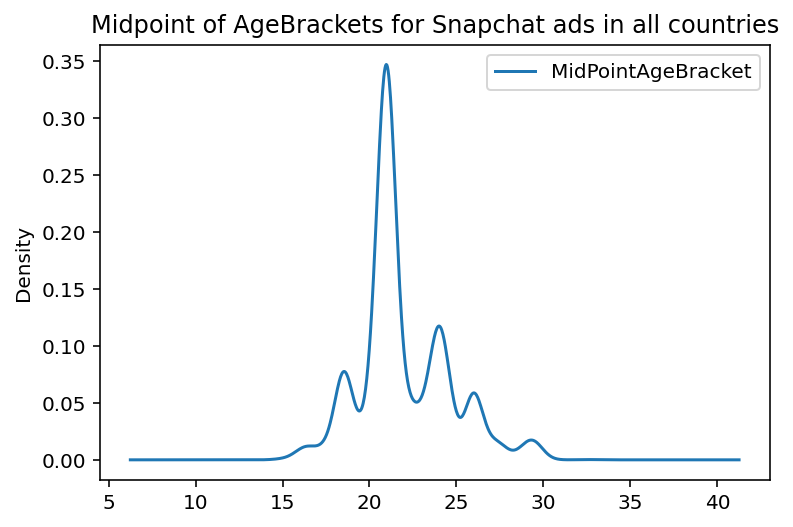

In [7]:
title='Midpoint of AgeBrackets for Snapchat ads in all countries'
(
    political_2018_2019
    .MidPointAgeBracket
    .plot(kind='kde', legend=True, subplots=False, title=title)
);

print('The mean midpoint of agebrackets for all countries in the dataset is ' + str(np.mean(political_2018_2019['MidPointAgeBracket'])))

The mean midpoint of agebrackets for the US is 22.132918245804007


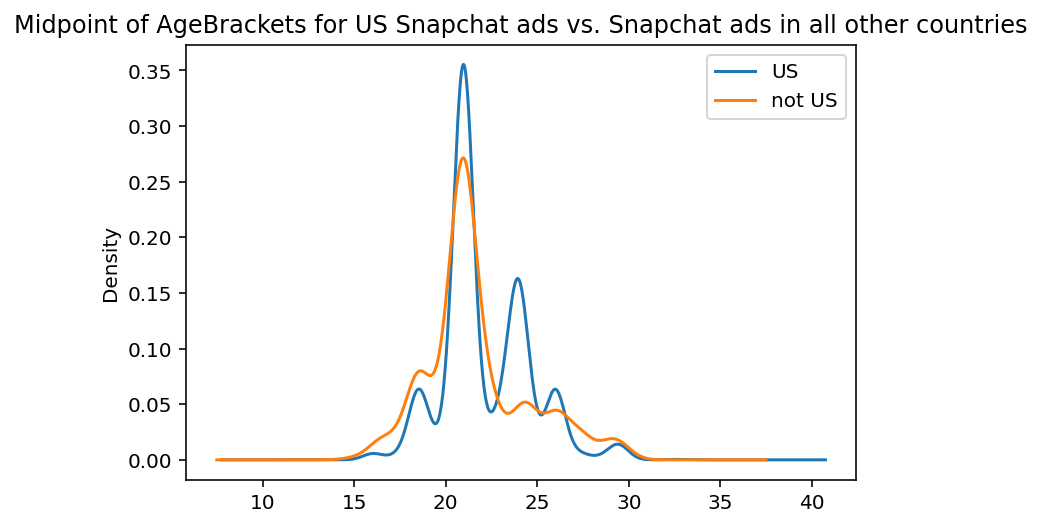

In [8]:
us_political  = political_2018_2019[political_2018_2019['CountryCode'] == 'united states']
title='Midpoint of AgeBrackets for US Snapchat ads vs. Snapchat ads in all other countries'
(
    political_2018_2019
    .assign(isUS = (political_2018_2019['CountryCode'] == 'united states').replace({True: 'US', False: 'not US'}))
    .groupby('isUS')['MidPointAgeBracket']
    .plot(kind='kde', legend=True, subplots=False, title=title)
);

print('The mean midpoint of agebrackets for the US is ' + str(np.mean(us_political['MidPointAgeBracket'])))

In [9]:
political_2018_2019.groupby('CountryCode')['MidPointAgeBracket'].apply(np.mean)

CountryCode
argentina               21.000000
australia               22.640625
austria                 21.078125
belgium                 21.785714
brazil                  18.500000
canada                  22.418155
chile                   18.500000
denmark                 20.432990
finland                 18.942857
france                  21.371212
germany                 20.772727
india                   20.777778
iraq                    21.000000
ireland                 20.714286
kuwait                  21.757143
lithuania               21.000000
netherlands             22.013158
new zealand             27.000000
nigeria                 25.277778
norway                  21.944892
poland                  19.250000
puerto rico             18.500000
south africa            21.000000
sweden                  19.809524
switzerland             20.531250
turkey                  18.500000
united arab emirates    21.000000
united kingdom          21.781746
united states           22.132918
Na

### Assessment of Missingness

In [10]:
political_language = political_2018_2019.assign(Language_isnull = political_2018_2019.Language.isnull())
political_language.sample(replace = False, frac = 1).head()[['Language', 'Language_isnull', 'CountryCode']]

,Language,Language_isnull,CountryCode
1324,NaN,True,united states
1730,NaN,True,norway
750,en,False,new zealand
2440,NaN,True,united states
1427,en,False,united states


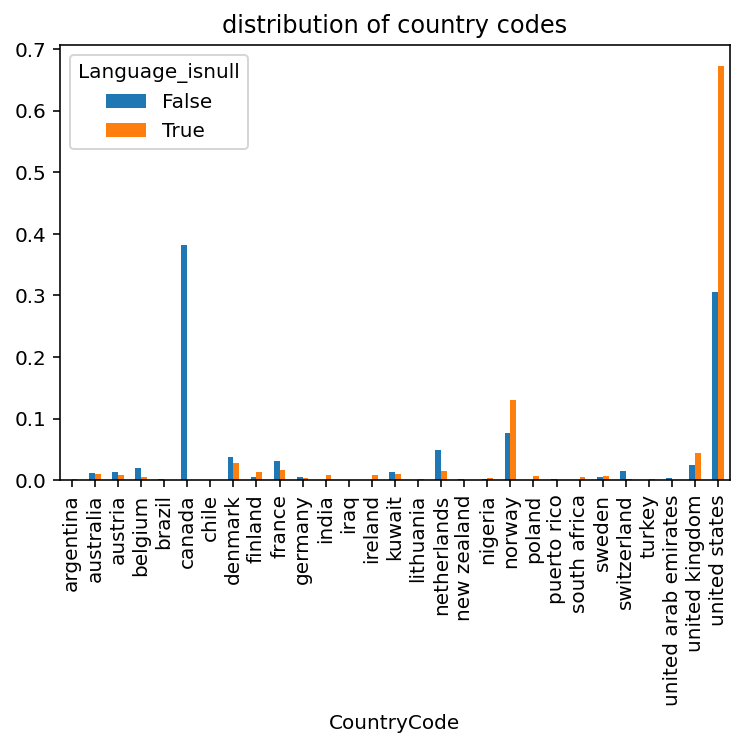

In [11]:
emp_distributions = (
    political_language
    .pivot_table(columns='Language_isnull', index='CountryCode', values=None, aggfunc='size')
    .fillna(0)
    .apply(lambda x: x/x.sum())
)

emp_distributions.plot(kind='bar', title='distribution of country codes');

In [12]:
observed_tvd = np.sum(np.abs(emp_distributions.diff(axis=1).iloc[:,-1])) / 2
observed_tvd

0.485869354526071

In [13]:
n_repetitions = 1000

country_language = political_language.copy()[['CountryCode', 'Language_isnull']]
tvds = []
for _ in range(n_repetitions):
    
    # shuffle the countries
    shuffled_countries = (
        country_language['CountryCode']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        country_language
        .assign(**{'Shuffled Countries': shuffled_countries})
    )
    
    # compute the tvd
    shuffed_emp_distributions = (
        shuffled
        .pivot_table(columns='Language_isnull', index='Shuffled Countries', values=None, aggfunc='size')
        .fillna(0)
        .apply(lambda x:x/x.sum())
    )
    
    tvd = np.sum(np.abs(shuffed_emp_distributions.diff(axis=1).iloc[:,-1])) / 2
    # add it to the list of results
    
    tvds.append(tvd)

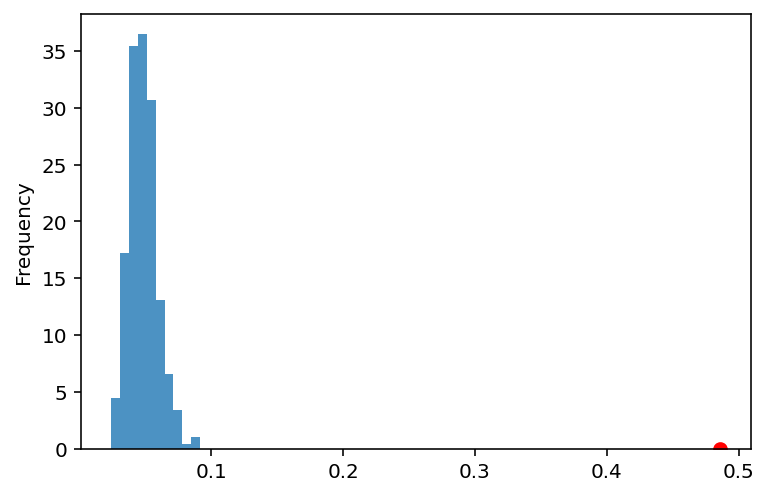

In [14]:
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8)
plt.scatter(observed_tvd, 0, color='red', s=40);

In [15]:
political_AgeBrackets = political_2018_2019.assign(AgeBracket_isnull = political_2018_2019.AgeBracket.isnull())
political_AgeBrackets.sample(replace = False, frac = 1).head()[['AgeBracket', 'AgeBracket_isnull', 'Impressions']]

,AgeBracket,AgeBracket_isnull,Impressions
523,18+,False,19330
2997,18+,False,33054
1745,16-24,False,492059
792,18+,False,8637
2027,16-,False,36027


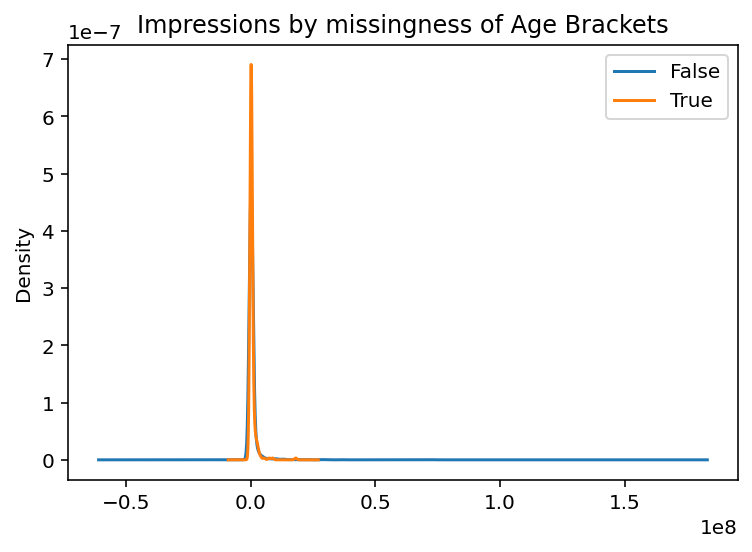

In [16]:
(
    political_AgeBrackets
    .groupby('AgeBracket_isnull')
    .Impressions
    .plot(kind='kde', legend=True, title='Impressions by missingness of Age Brackets')
);

In [17]:
n_repetitions = 1000

means = []
for _ in range(n_repetitions):
    
    # shuffle the Impressions column
    shuffled_col = (
        political_AgeBrackets['Impressions']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        political_AgeBrackets
        .assign(**{
            'Impressions': shuffled_col,
            'AgeBracket_isnull': political_AgeBrackets['AgeBracket'].isnull()
        })
    )
    
    # compute the differences in means
    mean = shuffled.groupby('AgeBracket_isnull')['Impressions'].mean().diff().abs().iloc[-1]
    
    means.append(mean)

In [18]:
obs = political_AgeBrackets.assign(AgeBracket_isnull=political_AgeBrackets['AgeBracket'].isnull()).groupby('AgeBracket_isnull')['Impressions'].mean().diff().abs().iloc[-1]
obs

155102.02537051053

0.467

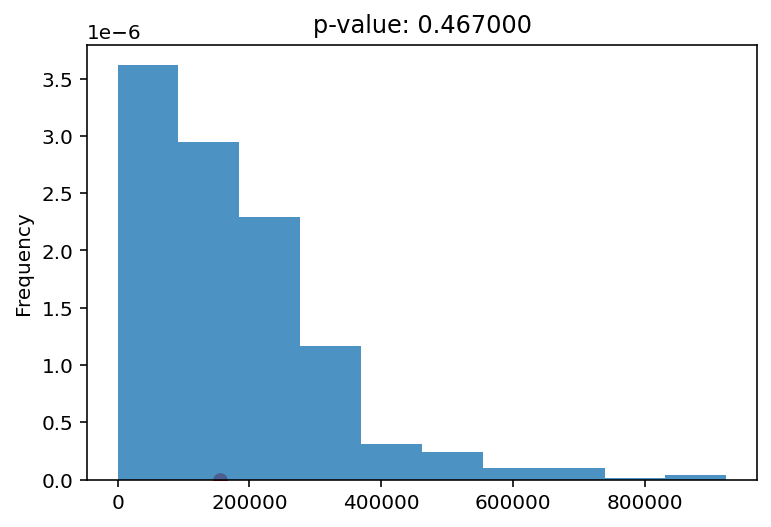

In [19]:
pval = np.mean(means > obs)
pd.Series(means).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)
plt.scatter(obs, 0, color='red', s=40);
pval

### Hypothesis Test

In [20]:
observed_mean = np.mean(us_political['MidPointAgeBracket'])
observed_mean

22.132918245804007

In [21]:
n_repetitions = 1000

mean_midpoints = []
for _ in range(n_repetitions):
    
    # sample n number of midpoint ages from population
    sampled_countries = (
        political_2018_2019['MidPointAgeBracket']
        .sample(n = len(us_political['MidPointAgeBracket']), replace=False)
        .reset_index(drop=True)
    )
    
    # compute the mean midpoint
    mean_midpoint_age = np.mean(sampled_countries)
    
    # add it to the list of results
    mean_midpoints.append(mean_midpoint_age)

0.0


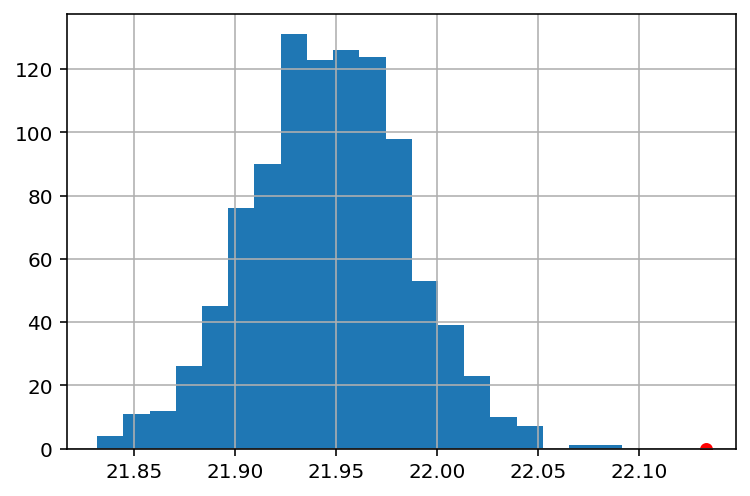

In [22]:
pd.Series(mean_midpoints).hist(bins = 20)
plt.scatter(observed_mean, 0, color='red', s=30);
print(np.mean(pd.Series(mean_midpoints) > observed_mean))

In [23]:
political_2018_2019.isna().sum()

ADID                              0
CreativeUrl                       1
Spend                             0
Impressions                       0
StartDate                         0
EndDate                         647
OrganizationName                  0
BillingAddress                    0
CandidateBallotInformation     3034
PayingAdvertiserName              0
Gender                         2904
AgeBracket                      272
CountryCode                       0
RegionID                       2240
ElectoralDistrictID            3160
LatLongRad                     3225
MetroID                        3055
Interests                      2469
OsType                         3204
Segments                       1092
LocationType                   3207
Language                       2345
AdvancedDemographics           3131
Targeting Connection Type      3225
Targeting Carrier (ISP)        3225
Targeting Geo - Postal Code    2843
CreativeProperties              640
Year                        